Perform Data Analysis

-- Stock 
1 - Top 10 Position by Fund
2 - Top 10 Positions in total

-- Flow
1 - Daily Change
2 - Change to the benchmark date

In [1]:
%matplotlib widget
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os


In [9]:
out_dir = r'C:\investment_ds\ark_innovation\ARK_TRACKER_Py\Output'
input_dir = r'C:\investment_ds\ark_innovation\ARK_TRACKER_Py\Input'

file_list = [f for f in os.listdir(input_dir) if f.endswith('.xlsx')]
print(file_list)

['FundDs_01112023.xlsx', 'FundDs_01122023.xlsx', 'FundDs_01132023.xlsx', 'FundDs_01182023.xlsx', 'FundDs_01192023.xlsx', 'FundDs_01202023.xlsx', 'FundDs_01242023.xlsx', 'FundDs_01252023.xlsx', 'FundDs_01262023.xlsx', 'FundDs_01272023.xlsx', 'FundDs_01302023.xlsx', 'FundDs_01312023.xlsx', 'FundDs_02012023.xlsx', 'FundDs_02022023.xlsx', 'FundDs_02032023.xlsx', 'FundDs_02062023.xlsx', 'FundDs_02072023.xlsx', 'FundDs_02082023.xlsx', 'FundDs_02102023.xlsx', 'FundDs_02142023.xlsx', 'FundDs_02152023.xlsx', 'FundDs_02162023.xlsx', 'FundDs_02172023.xlsx', 'FundDs_02212023.xlsx', 'FundDs_02222023.xlsx', 'FundDs_02232023.xlsx', 'FundDs_02242023.xlsx', 'FundDs_02272023.xlsx', 'FundDs_02282023.xlsx', 'FundDs_03012023.xlsx', 'FundDs_03022023.xlsx', 'FundDs_03032023.xlsx', 'FundDs_03062023.xlsx', 'FundDs_03072023.xlsx', 'FundDs_03092023.xlsx', 'FundDs_03132023.xlsx', 'FundDs_03142023.xlsx', 'FundDs_03152023.xlsx', 'FundDs_03162023.xlsx', 'FundDs_03172023.xlsx', 'FundDs_03202023.xlsx', 'FundDs_0321202

In [10]:
# Read in the latest file to display the columns
# for file in os.listdir("/mydir"):
#     if file.endswith(".txt"):
#         print(os.path.join("/mydir", file))

input_file = os.path.join(input_dir, file_list[3])

display_ds = pd.read_excel(input_file, sheet_name = None, index_col=0)
display_ds.keys()

display_ds['ARKK'].head()

,date,fund,company,ticker,cusip,shares,MktVal_dollar,weight_pct
0,01/18/2023,ARKK,EXACT SCIENCES CORP,EXAS,30063P105,"9,527,288","$651,475,953.44",9.25%
1,01/18/2023,ARKK,ZOOM VIDEO COMMUNICATIONS-A,ZM,98980L101,"8,382,207","$585,664,803.09",8.32%
2,01/18/2023,ARKK,TESLA INC,TSLA,88160R101,"3,959,617","$520,650,039.33",7.39%
3,01/18/2023,ARKK,ROKU INC,ROKU,77543R102,"9,106,791","$464,719,544.73",6.60%
4,01/18/2023,ARKK,BLOCK INC,SQ,852234103,"5,828,801","$437,742,955.10",6.22%


In [11]:
# Remove the bottom row(s) without ticker
for fund_ds in display_ds.keys():
    display_ds[fund_ds].dropna(subset=['ticker'], inplace=True)

In [12]:
display_ds.keys()

dict_keys(['ARKK', 'ARKW', 'ARKG', 'ARKQ', 'ARKF', 'ARKX', 'PRNT', 'IZRL', 'Total_All_Fund'])

Top 10 Position by Fund

In [9]:
def pie_plot(input_ds:'pd.DataFrame', label_var, value_var, num_stock = 10, **kwarg):
    """ Pie plot for the top stocks' market share"""
    
    ds = input_ds.copy()
    
    ds.sort_values(by = 'weight_pct', ascending=False, inplace=True)
    
    # Create Pie Chart for the top stocks
    labels = ds[label_var][0:num_stock]
    size = ds[value_var][0:num_stock].str.replace("\$|,", "") # Remove "$" and ","
    
    fig, ax = plt.subplots(**kwarg)

    explode = np.concatenate(([1], np.repeat(0, num_stock-1) )) # only "explode" the 2nd slice (i.e. 'Hogs')

    ax.pie(size, explode=explode, labels=labels, autopct='%2.1f%%',
            shadow=True, startangle=0)
            
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    date_label = ds.loc[0,'date']
    fund_label = ds.loc[0, 'fund']

    ax.set(title = '{fund_name} top {select_num} Holdings Share by the end of {date}'.format(fund_name = fund_label, 
    select_num = num_stock, date = date_label))
   
    return fig



In [23]:
def pie_plot_mult(input_dic:'dict', label_var = "company", 
                  value_var = "MktVal_dollar", num_stock = 10, **kwarg):
    
    """
    input_dic: a collection of input_ds (fund ds)
    **arg: plt.subplots() arguments
    """
    try:
        fund_label = list(input_dic.keys())
        fund_label.remove('Total_All_Fund')
        print("Total_All_Fund is already added to the raw data frame")
    except KeyError:
        fund_label = input_dic.keys()
        print("Total_All_Fund has NOT been added to the raw data frame")

    # Exclude 'Total_All_Fund'

    fig, ax = plt.subplots(**kwarg)

    ax_flat = ax.flatten() # There are some plots may be empty
    
    for i, fund in enumerate(fund_label):
        
        # There are some plots may be empty, we loop over the dic only!
        ds = input_dic[fund]
        ds.sort_values(by = 'weight_pct', ascending=False, inplace=True)
        
        # Create Pie Chart for the top stocks
        labels = ds[label_var][0:num_stock]
        size = ds[value_var][0:num_stock].str.replace("\$|,", "", regex = True)
        
        explode = np.concatenate(([1], np.repeat(0, num_stock-1) )) # only "explode" the 2nd slice (i.e. 'Hogs')

        ax_flat[i].pie(size, explode=explode, labels=labels, autopct='%2.1f%%',
            shadow=True, startangle=0)
            
        ax_flat[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        date_label = ds.loc[0,'date']
        fund_label = ds.loc[0, 'fund']

        ax_flat[i].set(title = '{fund_name} top {select_num} Holdings Share by the end of {date}'.format(fund_name = fund_label, 
        select_num = num_stock, date = date_label))

        print("{} is plotted!".format(fund))

    return fig

Total_All_Fund is already added to the raw data frame
ARKK is plotted!
ARKW is plotted!
ARKG is plotted!
ARKQ is plotted!
ARKF is plotted!
ARKX is plotted!
PRNT is plotted!
IZRL is plotted!


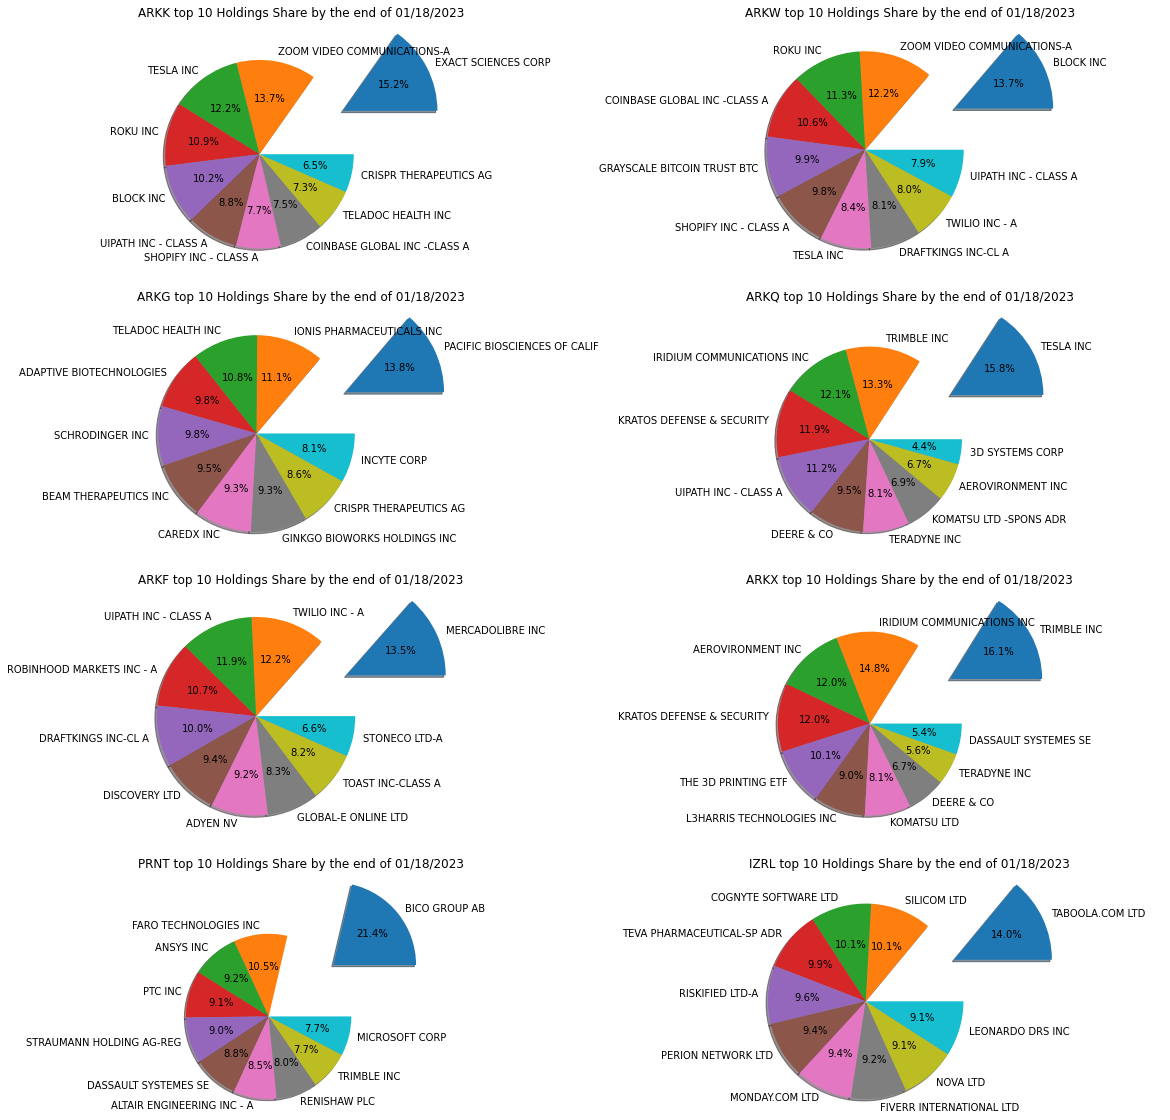

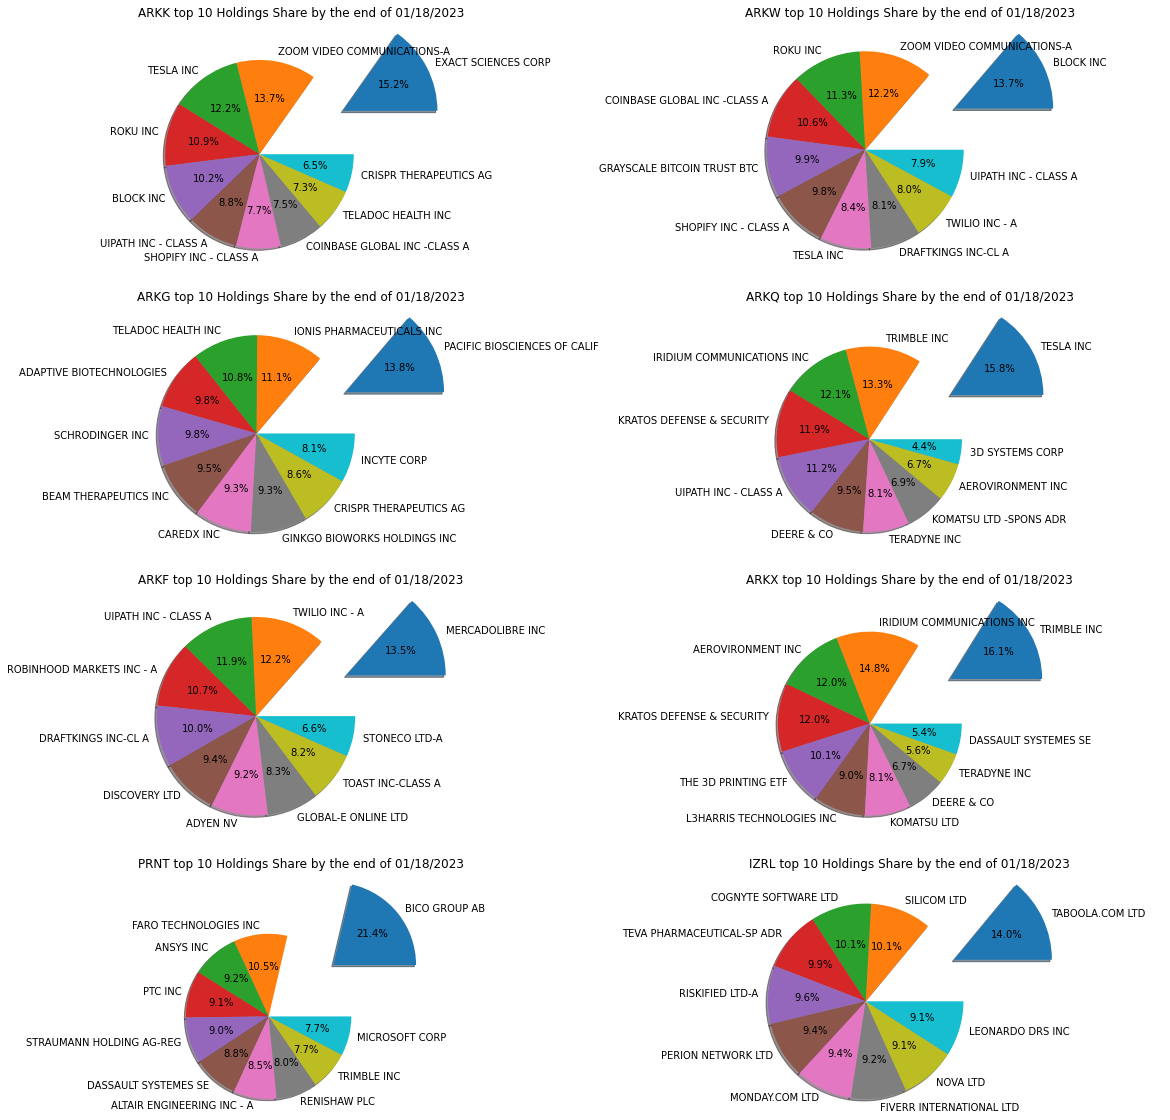

In [24]:
%matplotlib inline
pie_plot_mult(input_dic = display_ds, nrows=4, ncols=2, figsize=(20,20))

Get the Top 10 Holdings in Total (eight funds)

In [9]:
display_ds['ARKK'].columns

Index(['date', 'fund', 'company', 'ticker', 'cusip', 'shares', 'MktVal_dollar',
       'weight_pct'],
      dtype='object')

In [10]:
# reduce function is NOT available in Python any more, we can define one
def rename_col(input_ds):
    # date fund company ticker cusip shares MktVal_dollar weight_pct
    fund_flag = input_ds.fund[0]

    out_ds = input_ds.copy()

    out_ds = out_ds.loc[:,['ticker', 'shares', 'MktVal_dollar']]
    new_col = ['ticker'] + [fund_flag + "_" + old_name for old_name in out_ds.columns[1:]]

    out_ds.columns = new_col

    return out_ds
    
def reduce(func, iterable, **kwarg):
    
    result = iterable[0]
    
    for i in np.arange(1, len(iterable)):
        result = func(result, iterable[i], **kwarg)

    return result


In [11]:
ds_list = [rename_col(ds) for ds in display_ds.values()]

all_fund_df = reduce(pd.merge, ds_list, how='outer')

all_fund_df = all_fund_df.replace("\$|,", "", regex = True)

all_fund_df.iloc[:,1:] = all_fund_df.iloc[:,1:].apply(pd.to_numeric)

In [19]:
# Calculate the holdings of all ARK funds
import re
share_cols = all_fund_df.filter(regex=re.compile('shares')).columns
dollar_cols = all_fund_df.filter(regex=re.compile('dollar')).columns

all_fund_df['Total_Share'] = all_fund_df.loc[:, share_cols].sum(axis=1)
all_fund_df['Total_MktVal_dollar'] = all_fund_df.loc[:, dollar_cols].sum(axis=1)

all_fund_df_sorted = all_fund_df.sort_values('Total_MktVal_dollar', ascending=False, ignore_index = True).reset_index()

In [20]:
all_fund_df_sorted

,index,ticker,ARKK_shares,ARKK_MktVal_dollar,ARKW_shares,ARKW_MktVal_dollar,ARKG_shares,ARKG_MktVal_dollar,ARKQ_shares,ARKQ_MktVal_dollar,ARKF_shares,ARKF_MktVal_dollar,ARKX_shares,ARKX_MktVal_dollar,PRNT_shares,PRNT_MktVal_dollar,IZRL_shares,IZRL_MktVal_dollar,Total_Share,Total_MktVal_dollar
0,0,EXAS,9527288.0,651475953.44,NaN,NaN,4325912.0,295805862.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13853200.0,2.841845e+09
1,1,ZM,8382207.0,585664803.09,1221441.0,85342082.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9603648.0,2.013021e+09
2,2,TSLA,3959617.0,520650039.33,447387.0,58826916.63,NaN,NaN,657043.0,86394584.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5064047.0,1.997615e+09
3,3,SQ,5828801.0,437742955.1,1282613.0,96324236.3,NaN,NaN,NaN,NaN,1141329.0,85713807.9,NaN,NaN,NaN,NaN,NaN,NaN,8252743.0,1.859343e+09
4,4,PATH,26196059.0,376175407.24,3844845.0,55211974.2,3127004.0,44903777.44,4272943.0,61359461.48,2957758.0,42473404.88,580030.0,8329230.8,NaN,NaN,NaN,NaN,40978639.0,1.765360e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,216,NIO,NaN,NaN,NaN,NaN,NaN,NaN,7067.0,80634.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7067.0,2.419034e+05
217,217,SATX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3898.0,27831.72,3898.0,8.349516e+04
218,218,TCS LI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,607059.0,6070.59,NaN,NaN,NaN,NaN,NaN,NaN,607059.0,1.821177e+04
219,219,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,666.5,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1.999500e+03


In [27]:
# Add this table to the raw data for later analysis
all_fund_df_sorted.loc[:, ['ticker', 'Total_Share', 'Total_MktVal_dollar']]

with pd.ExcelWriter(input_file, engine = "openpyxl", mode = "a") as writer:
    # Use "append" mode with "openpyxl" engine
    # Write the new DataFrame to a new tab in the ExcelWriter object
    all_fund_df_sorted.to_excel(writer, sheet_name='Total_All_Fund')




ValueError: Sheet 'Total_All_Fund' already exists and if_sheet_exists is set to 'error'.

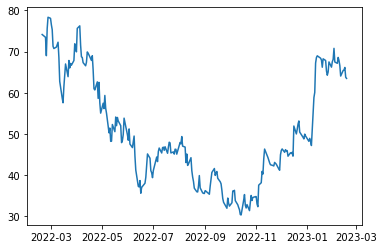

In [10]:
# Get Yahoo finance data of the stock in interest
import yfinance as yf

def get_stock_data(ticker):
    stock_data = yf.Ticker(ticker).history(period="1y") # e.g., 1y, 6mo
    return stock_data

stock_data = get_stock_data('EXAS')

plt.plot(stock_data.Close)

C:\Users\sslcg\AppData\Local\Temp/ipykernel_15708/603252958.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  size = ds[value_var][0:num_stock].str.replace("\$|,", "")


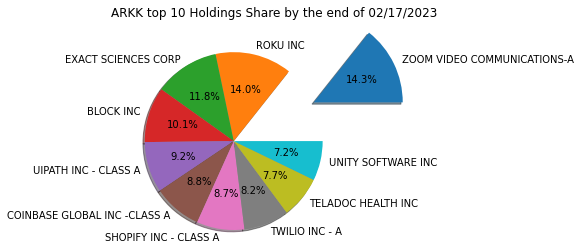

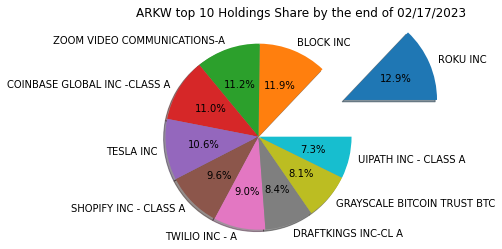

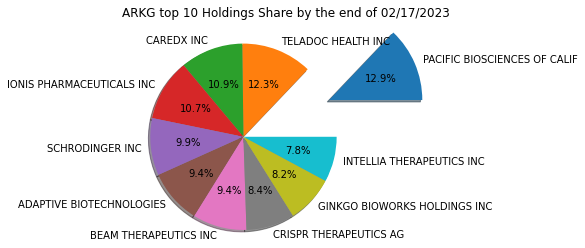

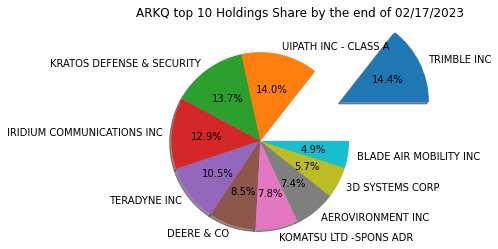

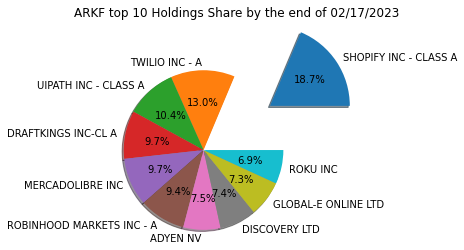

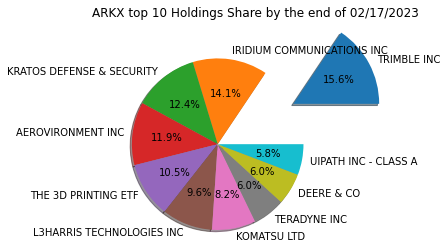

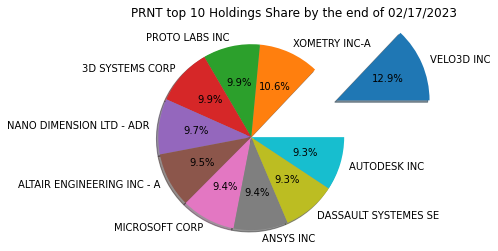

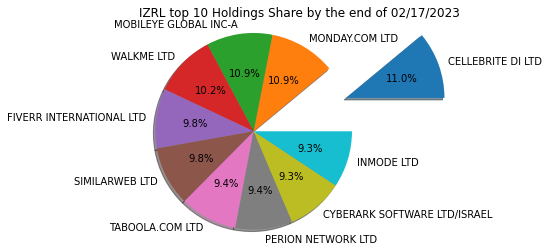

In [11]:
fund_name_tuple = ('ARKK', 'ARKW', 'ARKG', 'ARKQ', 'ARKF', 'ARKX','PRNT','IZRL')

for fund in fund_name_tuple:
    pie_plot(display_ds[fund], "company", "MktVal_dollar")


Top 10 in All Funds

In [12]:
arr = np.array([[1.0, 2.0, 3.0],
                [4.0, 5.0, 6.0],
                [7.0, 8.0, 9.0]])

shifted_arr = np.roll(arr, 1, axis=0)
shifted_arr[0,:] = np.NaN # np.nan cannot be used for int array
shifted_arr[0,:] = shifted_arr[0,:].astype(int) #NaN not exist in "int"
print(shifted_arr)

np.isnan(shifted_arr)
type(shifted_arr[0,0])

[[-2.14748365e+09 -2.14748365e+09 -2.14748365e+09]
 [ 1.00000000e+00  2.00000000e+00  3.00000000e+00]
 [ 4.00000000e+00  5.00000000e+00  6.00000000e+00]]


numpy.float64